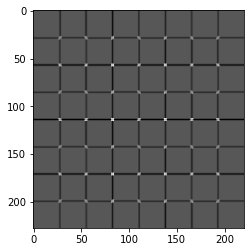

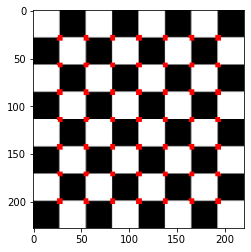

In [39]:
#函数：cv.cornerHarris(), cv.cornerSubPix()
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img24 = cv.imread("../Images/img24.png")
#print(img24.shape)
gray = cv.cvtColor(img24, cv.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv.cornerHarris(gray, 2, 3, 0.04)
plt.imshow(dst,'gray')
plt.show()
#result 用于标记角点，不重要
dst = cv.dilate(dst,None)
img24[dst > 0.01 * dst.max() ] = [0, 0, 255]
img24 = img24[:,:,::-1]
plt.imshow(img24)
plt.show()

(197, 256, 3)


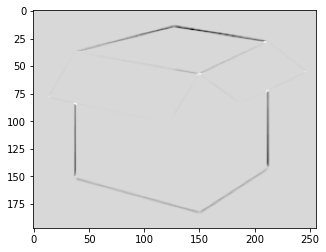

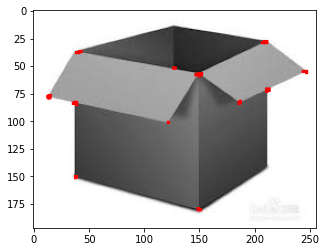

In [29]:
img25 = cv.imread("../Images/img25.jpg")
print(img25.shape)
gray = cv.cvtColor(img25, cv.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv.cornerHarris(gray, 2, 3, 0.04)
plt.imshow(dst,'gray')
plt.show()
#result 用于标记角点，不重要
dst = cv.dilate(dst,None)
img25[dst > 0.01 * dst.max() ] = [0, 0, 255]
img25 = img25[:,:,::-1]
plt.imshow(img25)
plt.show()

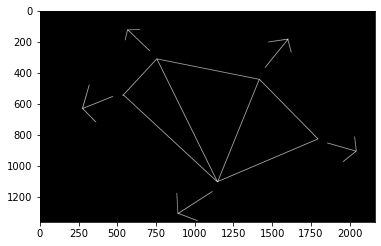

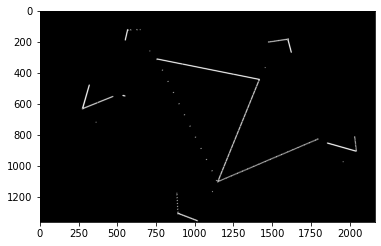

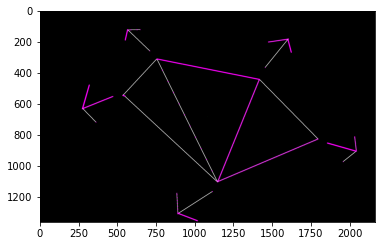

In [43]:
#SubPixel精度的转角
img26 = cv.imread("../Images/img26.png")
#print(img26.shape)
gray = cv.cvtColor(img26, cv.COLOR_BGR2GRAY)
plt.imshow(gray, 'gray')
plt.show()
#利用哈里斯角检测
gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,3,0.04)
dst = cv.dilate(dst,None)
ret, dst = cv.threshold(dst,0.005*dst.max(),255,0)
dst = np.uint8(dst)
plt.imshow(dst, 'gray')
plt.show()
# 寻找质心
ret, labels, stats, centroids = cv.connectedComponentsWithStats(dst)
# 定义停止和完善拐角的条件
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv.cornerSubPix(gray,np.float32(centroids),(11,11),(-1,-1),criteria)

# 绘制
res = np.hstack((centroids,corners))
res = np.int0(res)
img26[dst > 0.5 * dst.max()]=[255,0,255]
img26[res[:,1],res[:,0]]=[0,0,255]
img26[res[:,3],res[:,2]] = [0,255,0]

#img26 = img26[:,:,::-1]
plt.imshow(img26)
plt.show()